___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [33]:
import pandas as pd 

# Visualization libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np 

from tensorflow.keras.models import Sequential


In [34]:
df = pd.read_csv('C:/Users/hessa/Churn Prediction/Churn-Prediction/1-Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [35]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [38]:
df.shape

(10000, 14)

In [39]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
# Drop the features that not suitable for modelling
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], index=1, inplace=True)

In [42]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [43]:
# Implement basic visualization steps such as histogram, countplot, heatmap

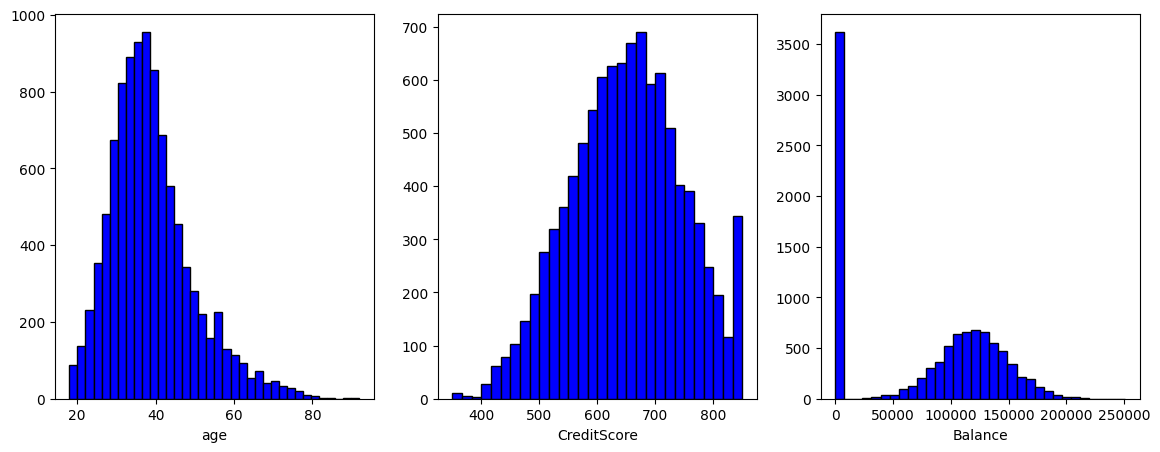

In [44]:
plt.figure(figsize = [14, 5])
plt.subplot(1,3,1)
plt.hist(df['Age'], bins = int(180/5), color = 'blue', edgecolor = 'black')
plt.xlabel("age")


plt.subplot(1,3,2)
plt.hist(df['CreditScore'], bins = int(150/5), color = 'blue', edgecolor = 'black')
plt.xlabel("CreditScore")


plt.subplot(1,3,3)
plt.hist(df['Balance'], bins = int(160/5), color = 'blue', edgecolor = 'black')
plt.xlabel("Balance")



plt.show()

In [45]:
df_scale =df.select_dtypes('number')
df_scale.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

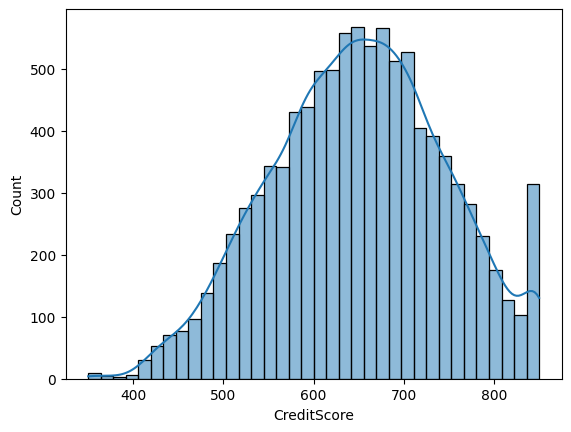

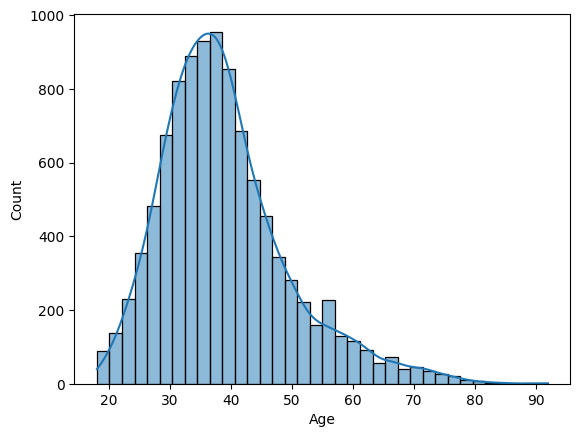

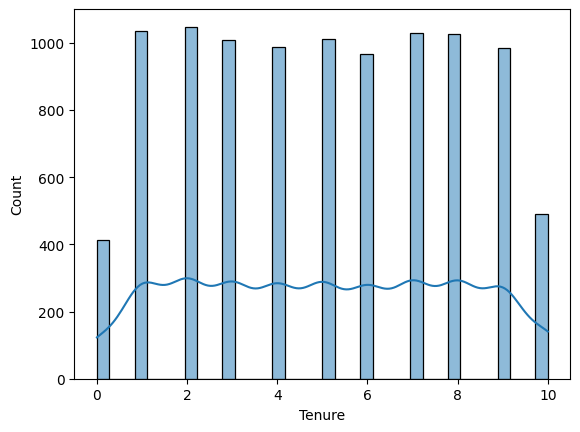

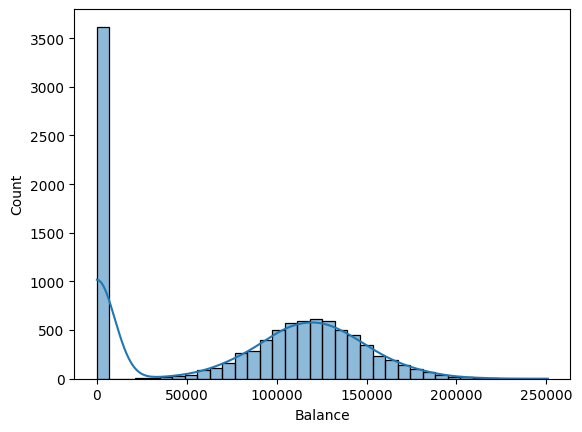

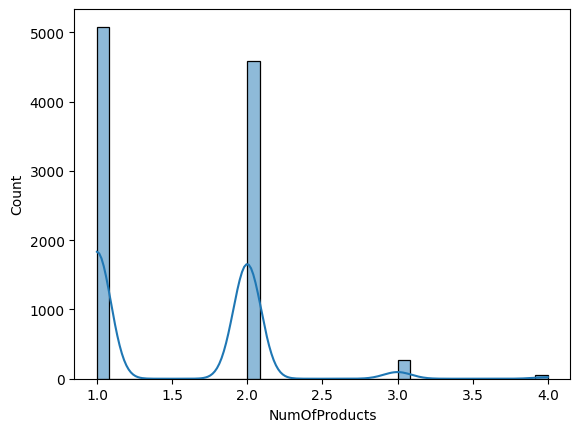

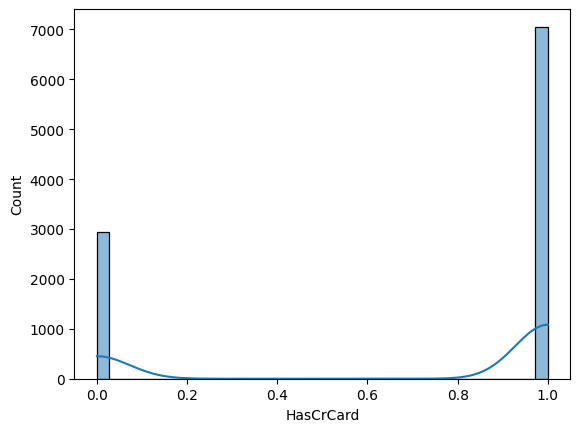

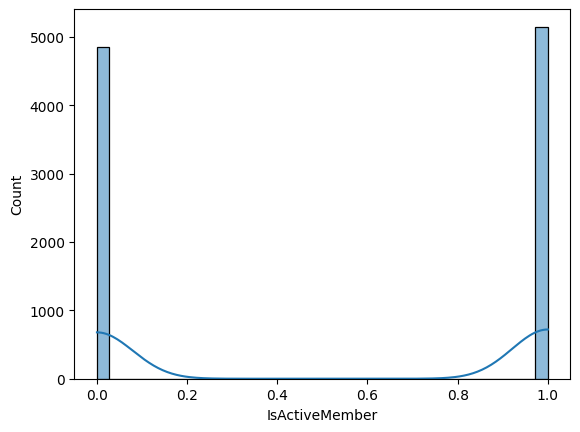

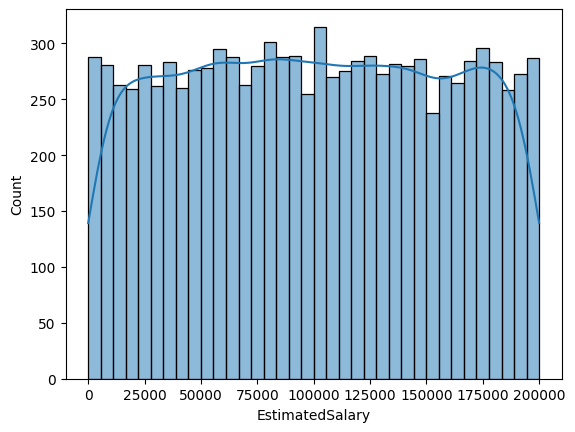

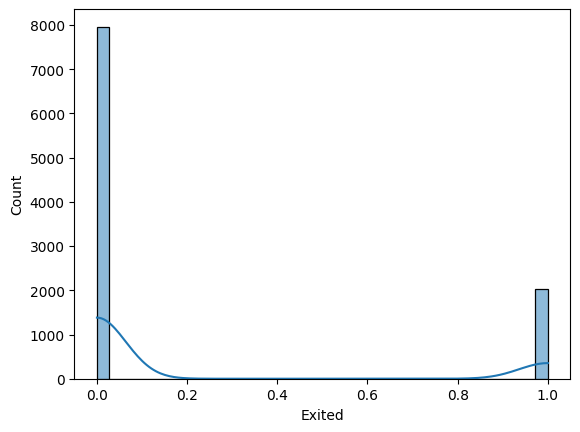

In [46]:
# a for loop 
for i in df_scale.columns:
    plt.subplots(1)
    sns.histplot(df_scale[i] , bins = int(180/5),kde=True)

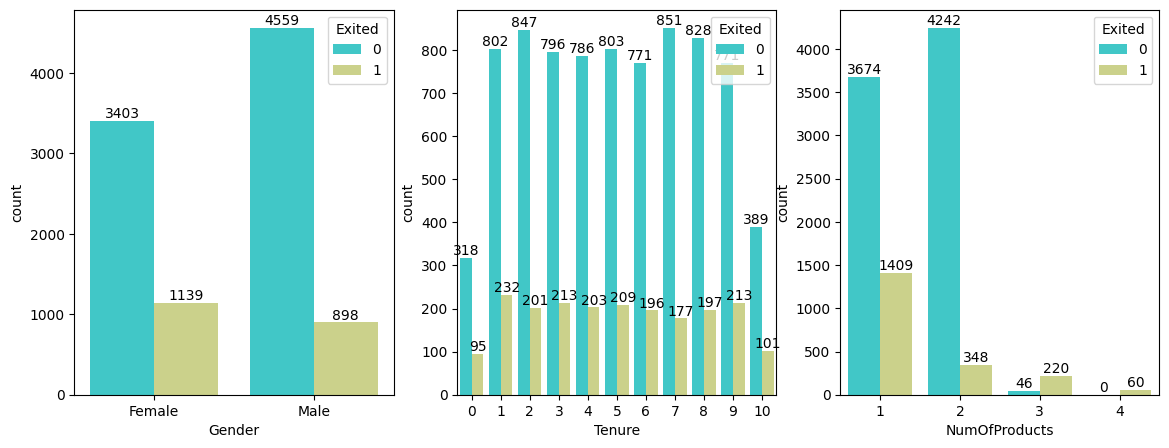

In [47]:
#countplot

plt.figure(figsize=(14,5))
plt.subplot(1, 3, 1)
ax = sns.countplot(data=df, x=df['Gender'], hue='Exited', palette="rainbow")
for i in ax.containers:
    ax.bar_label(i)

plt.subplot(1, 3, 2)
ax = sns.countplot(data=df, x=df['Tenure'], hue='Exited', palette="rainbow")
for i in ax.containers:
    ax.bar_label(i)

plt.subplot(1, 3, 3)
ax = sns.countplot(data=df, x=df['NumOfProducts'], hue='Exited', palette="rainbow")
for i in ax.containers:
    ax.bar_label(i)


plt.show()


<Axes: >

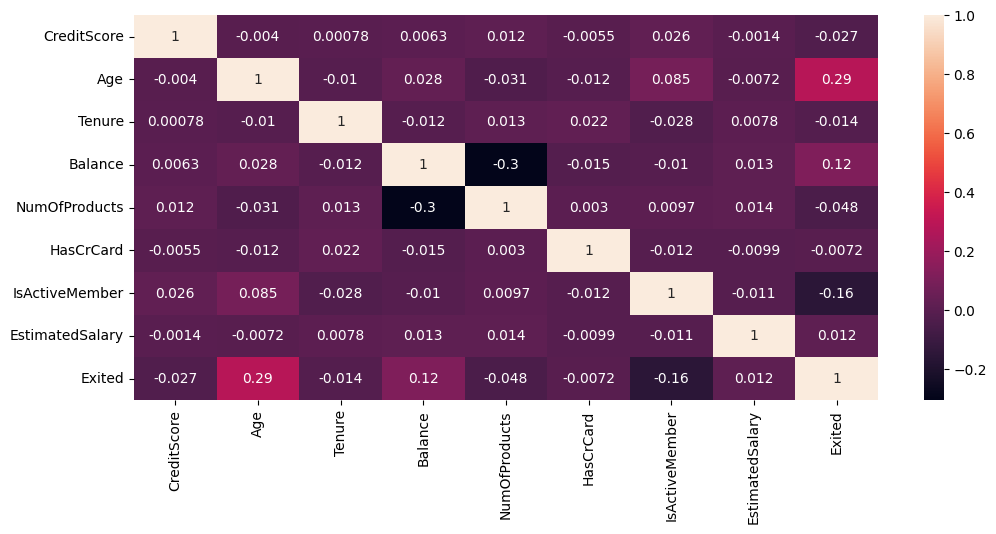

In [48]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(numeric_only=True),annot=True, cbar='cax')


In [49]:
# #Density 

In [50]:
# Convert categorical variables to dummy variables
[col for col in df.select_dtypes(include='object')]

['Geography', 'Gender']

In [51]:
df.select_dtypes(include='object')


,Geography,Gender
0,France,Female
2,France,Female
3,France,Female
4,Spain,Female
5,Spain,Male
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [61]:
df_con = pd.get_dummies(df, drop_first=True)


In [63]:
df_con


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
5,645,44,8,113755.78,2,1,0,149756.71,1,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


# Preprocessing of Data
- Train | Test Split, Scalling

In [54]:
X = df.drop(columns=['Exited'], axis=1)
X.shape

(9999, 11)

In [55]:
y = df['Exited']
y.shape


(9999,)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)


In [57]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, random_state=42, test_size=0.2, stratify=y_train)


In [58]:
print('Shape of X train :' , X_train.shape)
print('Shape of X test :', X_test.shape)
print('Shape of y train :', y_train.shape)
print('Shape of y test :', y_test.shape)
# print('Shape of y train :', X_val.shape)



Shape of X train : (6399, 11)
Shape of X test : (2000, 11)
Shape of y train : (6399,)
Shape of y test : (2000,)


In [59]:
# Normalization 

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [64]:
%store X_train
%store X_test
%store y_train
%store y_test
%store X_val
%store y_val

%store df
%store scaler

%store df
%store y
%store df_con



Stored 'X_train' (ndarray)
Stored 'X_test' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'X_val' (ndarray)
Stored 'y_val' (Series)
Stored 'df' (DataFrame)
Stored 'scaler' (MinMaxScaler)
Stored 'df' (DataFrame)
Stored 'y' (Series)
Stored 'df_con' (DataFrame)


## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___